In [1]:
# Imported Libraries
import numpy as np
import pandas as pd 
import copy
from collections import Counter
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer 
from imblearn.pipeline import Pipeline

#Sampling Libraries
from imblearn.over_sampling import SMOTE

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold

# Visual Libraries
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Performance metrics libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc
from sklearn.model_selection import ParameterGrid

# Tensorflow
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Lambda
from keras.losses import mse
from keras import regularizers
from keras import backend as K

from VAE import VAE_oversampling
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Setting the random seed 
import random
seed = 42
np.random.seed(seed) 
tf.random.set_seed(42)
random.seed(seed)

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Train, Validate, Test split

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

#Split data initially to train and remainingfor cross
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the validation dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The validation and test datasets have {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 227845
The number of records in the validation dataset is 56962
The training dataset has 227451 records for the majority class and 394 records for the minority class.
The validation and test datasets have 56864 records for the majority class and 98 records for the minority class.


In [2]:
def model_scores(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 score:", f1_score(y_true, y_pred))
    print("ROC_AUC:", roc_auc_score(y_true, y_pred))

### Hyperparameter Tuning with cross validation

############################### Parameters tested: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 34.0382 - val_loss: 29.0042
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 29.7625 - val_loss: 25.8674
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.6159 - val_loss: 25.6097
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.4780 - val_loss: 25.6942
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 28.0224 - val_loss: 25.3429
Epoch 6/100
284/284 [=======================

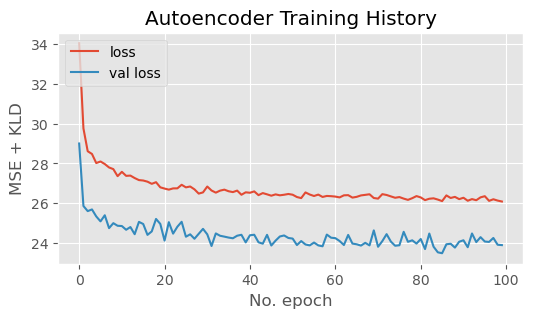

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 34.9930 - val_loss: 28.1953
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 30.3656 - val_loss: 25.7009
Epoch 3/100
283/283 [==============================] - 2s 6ms/step - loss: 28.9309 - val_loss: 25.1531
Epoch 4/100
283/283 [==============================] - 2s 8ms/step - loss: 28.3587 - val_loss: 24.7340
Epoch 5/100
283/283 [==============================] - 2s 6ms/step - loss: 28.0735 - val_loss: 24.7112
Epoch 6/100
283/283 [==============================] - 2s 7ms/step - loss: 28.0230 - val_loss: 24.5994
Epoch 7/100
283/283

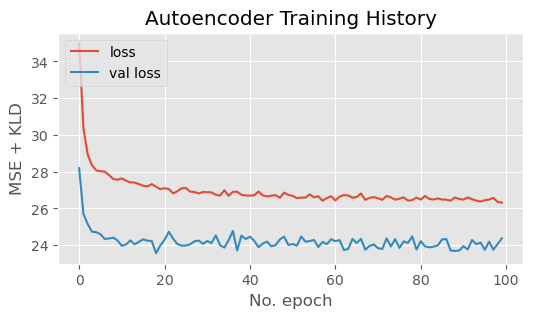

5677/5677 [==============================] - 9s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.3732 - val_loss: 28.3046
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2183 - val_loss: 25.5122
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.8723 - val_loss: 24.5067
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 28.4911 - val_loss: 24.3884
Epoch 5/100
283/283 [==============================] - 3s 10ms/step - loss: 28.1591 - val_loss: 24.9736
Epoch 6/100
283/283 [==============================] - 2s 8ms/step - loss: 28.2121 - val_loss: 24.3009
Epoch 7/100
283/283

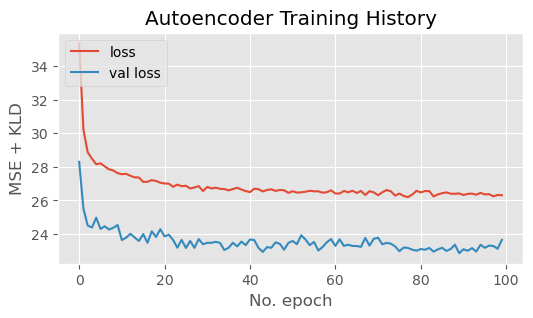

5677/5677 [==============================] - 9s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.9736 - val_loss: 29.0401
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.8771 - val_loss: 26.6496
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4838 - val_loss: 26.1055
Epoch 4/100
283/283 [==============================] - 2s 6ms/step - loss: 28.0685 - val_loss: 26.2601
Epoch 5/100
283/283 [==============================] - 2s 7ms/step - loss: 28.1479 - val_loss: 25.8083
Epoch 6/100
283/283 [==============================] - 2s 7ms/step - loss: 27.6270 - val_loss: 25.3386
Epoch 7/100
283/283 

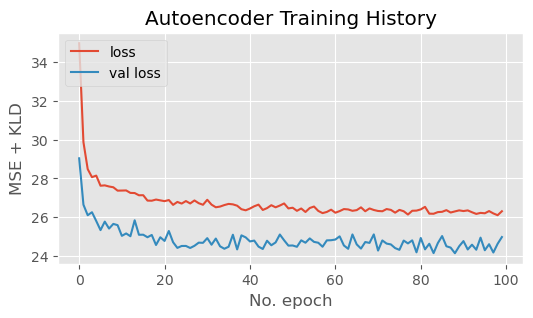

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 33.3349 - val_loss: 38.4064
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 28.6843 - val_loss: 36.1399
Epoch 3/100
283/283 [==============================] - 2s 5ms/step - loss: 27.4936 - val_loss: 35.6408
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 26.9084 - val_loss: 36.1615
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 26.8221 - val_loss: 35.3177
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 26.4719 - val_loss: 36.0336
Epoch 7/100
283/283

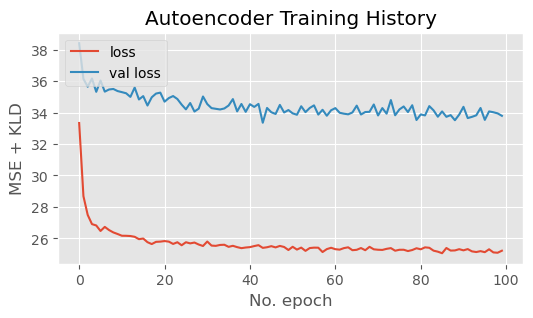

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 6ms/step - loss: 35.0055 - val_loss: 29.2088
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 29.7650 - val_loss: 25.7756
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.5110 - val_loss: 26.2374
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.2549 - val_loss: 25.6368
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 27.8744 - val_loss:

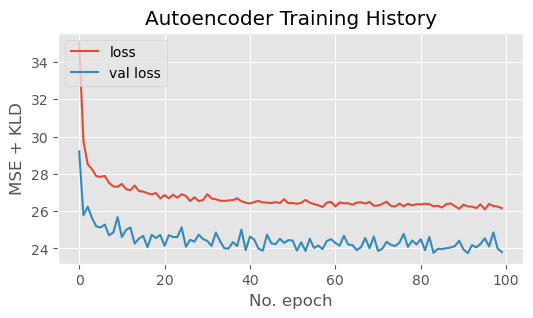

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.4383 - val_loss: 29.4933
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.4495 - val_loss: 25.9271
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7291 - val_loss: 24.8666
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4433 - val_loss: 25.1526
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0893 - val_loss: 24.6183
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9293 - val_loss: 24.8904
Epoch 7/100
283/283

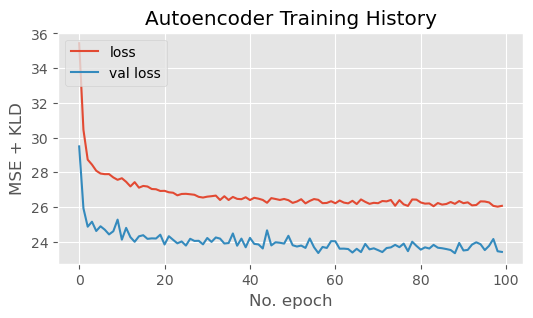

5677/5677 [==============================] - 9s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.2447 - val_loss: 27.3186
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.0930 - val_loss: 25.2563
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5957 - val_loss: 24.8405
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2324 - val_loss: 24.4584
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1521 - val_loss: 24.2281
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8444 - val_loss: 24.0320
Epoch 7/100
283/283 

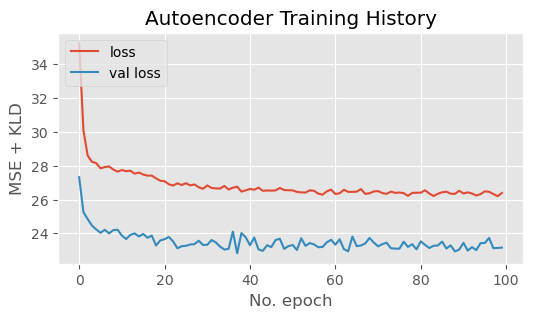

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.1724 - val_loss: 30.0794
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2138 - val_loss: 26.6192
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4947 - val_loss: 26.0399
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3372 - val_loss: 26.4883
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8201 - val_loss: 25.8818
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0305 - val_loss: 26.2002
Epoch 7/100
283/283

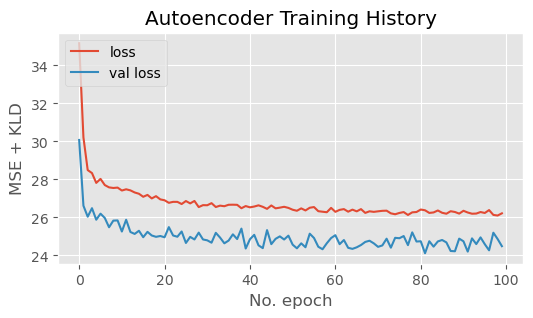

5677/5677 [==============================] - 9s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 33.8919 - val_loss: 39.1754
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.0174 - val_loss: 36.5594
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.4655 - val_loss: 36.3736
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 26.9754 - val_loss: 36.0964
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.6648 - val_loss: 36.0336
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.6835 - val_loss: 35.9158
Epoch 7/100
283/283 

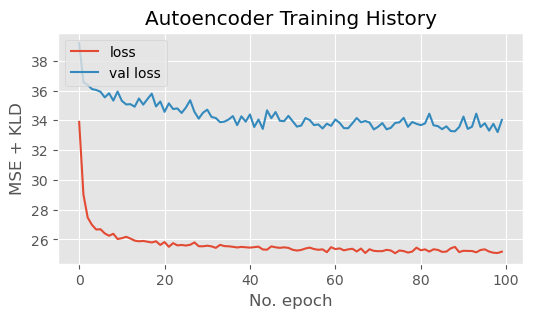

5677/5677 [==============================] - 9s 2ms/step
############################### Parameters tested: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 4ms/step - loss: 34.6294 - val_loss: 29.0415
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 29.7724 - val_loss: 26.0663
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.5795 - val_loss: 25.6581
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.3962 - val_loss: 25.6945
Epoch 5/100
284/284 [==============================] - 1s 2ms/step - loss: 28.0220 - val_l

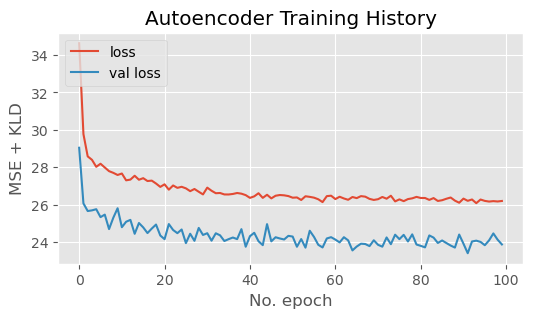

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 3ms/step - loss: 35.1278 - val_loss: 28.6667
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.0182 - val_loss: 25.5395
Epoch 3/100
283/283 [==============================] - 2s 7ms/step - loss: 28.6613 - val_loss: 24.9891
Epoch 4/100
283/283 [==============================] - 2s 7ms/step - loss: 28.5026 - val_loss: 25.0808
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 28.1143 - val_loss: 24.5758
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 28.0682 - val_loss: 25.1903
Epoch 7/100
283/283

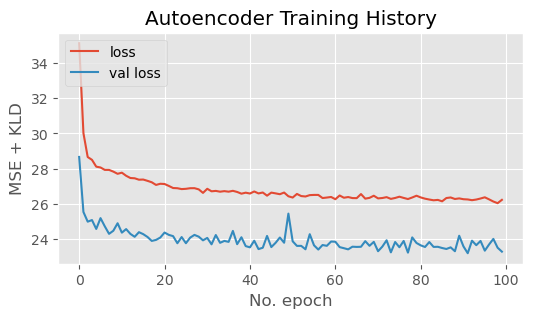

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.2213 - val_loss: 28.3638
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.1240 - val_loss: 25.4211
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4522 - val_loss: 24.7025
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3175 - val_loss: 24.7144
Epoch 5/100
283/283 [==============================] - 3s 10ms/step - loss: 28.1163 - val_loss: 24.5235
Epoch 6/100
283/283 [==============================] - 2s 6ms/step - loss: 27.9785 - val_loss: 24.1913
Epoch 7/100
283/28

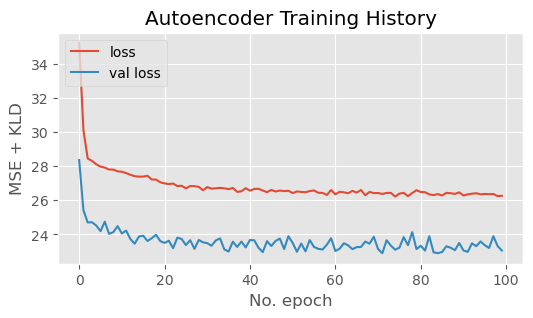

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.0920 - val_loss: 29.1628
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.7769 - val_loss: 26.7004
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.6743 - val_loss: 26.1287
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0600 - val_loss: 26.0799
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0720 - val_loss: 25.9872
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.8006 - val_loss: 26.3851
Epoch 7/100
283/283

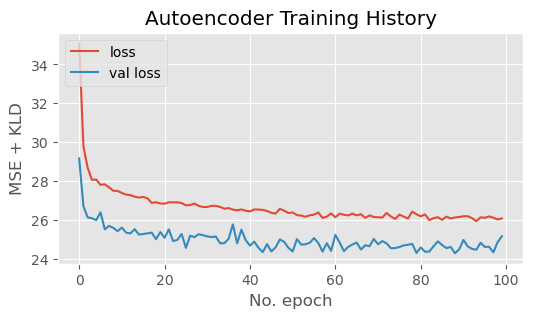

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.3183 - val_loss: 39.1798
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.7656 - val_loss: 37.0490
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.8407 - val_loss: 36.0250
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 27.1441 - val_loss: 35.6357
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 26.6915 - val_loss: 35.8420
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 26.7346 - val_loss: 35.5273
Epoch 7/100
283/283

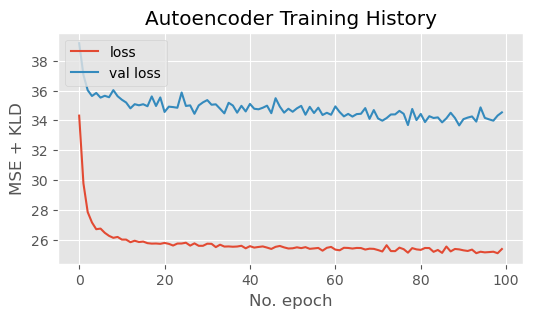

5677/5677 [==============================] - 15s 3ms/step
############################### Parameters tested: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 6ms/step - loss: 35.2383 - val_loss: 29.2731
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 29.8940 - val_loss: 25.9475
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.5709 - val_loss: 26.4954
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.0705 - val_loss: 25.4385
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 27.9417 - val_loss:

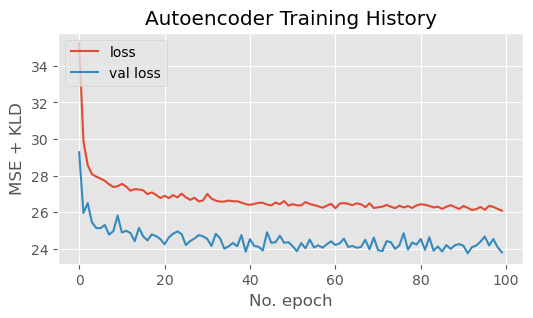

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.3272 - val_loss: 29.0945
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.4333 - val_loss: 25.8045
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7535 - val_loss: 24.9982
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3082 - val_loss: 24.5921
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9522 - val_loss: 24.7824
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8966 - val_loss: 24.4681
Epoch 7/100
283/283

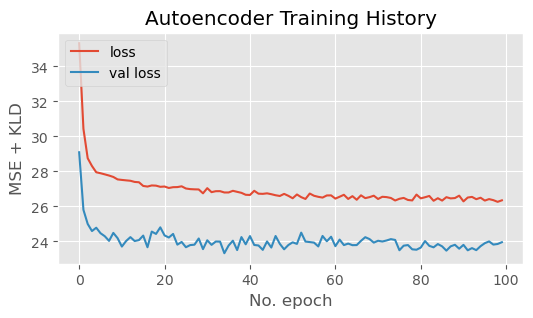

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 35.0501 - val_loss: 28.0595
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.1102 - val_loss: 25.1944
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4237 - val_loss: 24.9554
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2272 - val_loss: 24.4044
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1535 - val_loss: 24.3437
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9668 - val_loss: 23.9623
Epoch 7/100
283/283

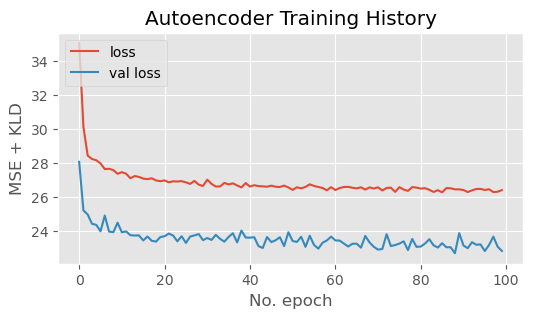

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.0604 - val_loss: 29.4561
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.9270 - val_loss: 26.7864
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6543 - val_loss: 25.9389
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2439 - val_loss: 25.7691
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8403 - val_loss: 25.7542
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8693 - val_loss: 25.6763
Epoch 7/100
283/283

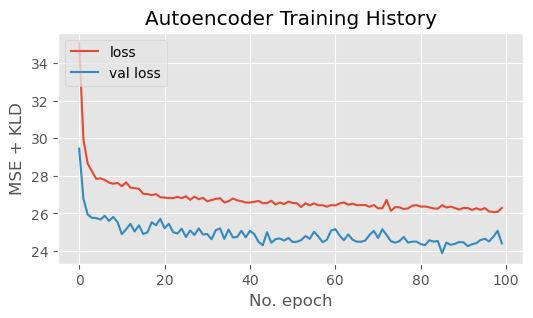

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.4532 - val_loss: 39.0809
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 28.9818 - val_loss: 36.8164
Epoch 3/100
283/283 [==============================] - 2s 6ms/step - loss: 27.5894 - val_loss: 36.1881
Epoch 4/100
283/283 [==============================] - 2s 6ms/step - loss: 27.2736 - val_loss: 36.0402
Epoch 5/100
283/283 [==============================] - 2s 6ms/step - loss: 26.7870 - val_loss: 36.2970
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 26.8116 - val_loss: 36.1223
Epoch 7/100
283/283

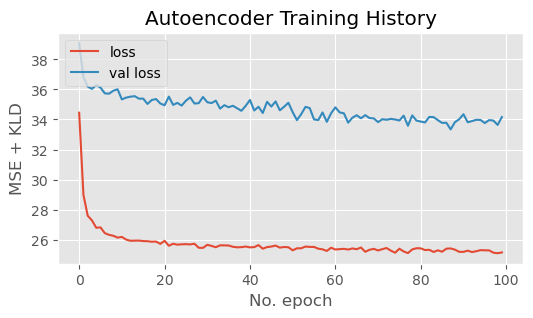

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 4ms/step - loss: 35.2151 - val_loss: 30.0294
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 30.5175 - val_loss: 26.5014
Epoch 3/100
284/284 [==============================] - 2s 6ms/step - loss: 28.7800 - val_loss: 25.5847
Epoch 4/100
284/284 [==============================] - 2s 7ms/step - loss: 28.3819 - val_loss: 25.6210
Epoch 5/100
284/284 [==============================] - 2s 6ms/step - loss: 27.9945 - val_l

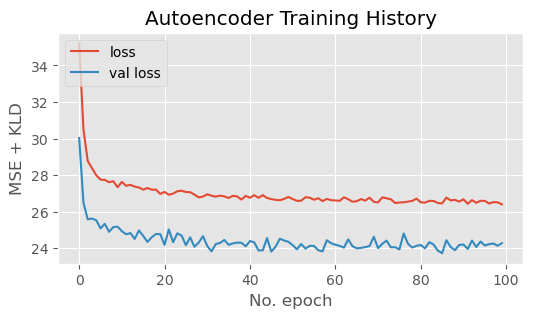

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.3743 - val_loss: 28.7753
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.5430 - val_loss: 25.6721
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.8488 - val_loss: 25.1292
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2249 - val_loss: 24.6374
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3360 - val_loss: 24.8116
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8995 - val_loss: 24.3013
Epoch 7/100
283/283

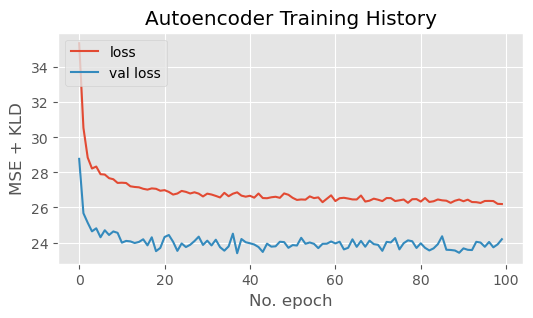

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.2900 - val_loss: 27.9497
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.4269 - val_loss: 25.3585
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7627 - val_loss: 24.8580
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3070 - val_loss: 24.5013
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2974 - val_loss: 24.7269
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0256 - val_loss: 24.0834
Epoch 7/100
283/283

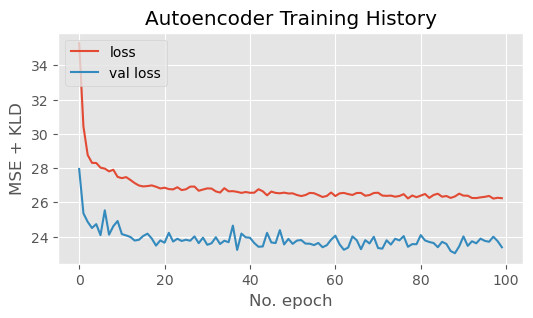

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.2768 - val_loss: 29.5630
Epoch 2/100
283/283 [==============================] - 2s 9ms/step - loss: 30.3272 - val_loss: 26.9449
Epoch 3/100
283/283 [==============================] - 2s 8ms/step - loss: 28.6762 - val_loss: 26.1733
Epoch 4/100
283/283 [==============================] - 2s 6ms/step - loss: 28.0720 - val_loss: 25.9657
Epoch 5/100
283/283 [==============================] - 2s 6ms/step - loss: 28.1676 - val_loss: 25.8216
Epoch 6/100
283/283 [==============================] - 2s 6ms/step - loss: 27.7331 - val_loss: 25.3237
Epoch 7/100
283/283

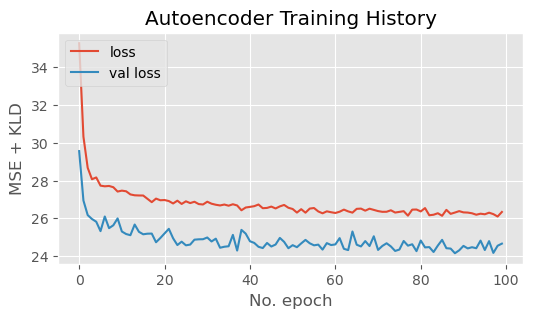

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 7ms/step - loss: 33.6740 - val_loss: 38.1195
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 28.4376 - val_loss: 36.0246
Epoch 3/100
283/283 [==============================] - 2s 6ms/step - loss: 27.2527 - val_loss: 35.8312
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 26.7640 - val_loss: 35.9731
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 26.6917 - val_loss: 35.4264
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 26.4663 - val_loss: 36.1133
Epoch 7/100
283/283

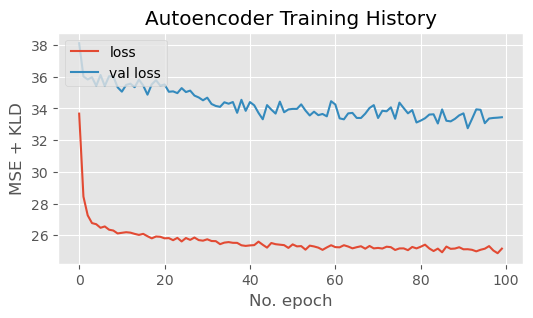

5677/5677 [==============================] - 12s 2ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 4ms/step - loss: 35.5074 - val_loss: 29.0084
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 30.0498 - val_loss: 26.2150
Epoch 3/100
284/284 [==============================] - 2s 8ms/step - loss: 28.6408 - val_loss: 25.8563
Epoch 4/100
284/284 [==============================] - 2s 7ms/step - loss: 28.3024 - val_loss: 25.5746
Epoch 5/100
284/284 [==============================] - 2s 6ms/step - loss: 28.0330 - val_loss: 

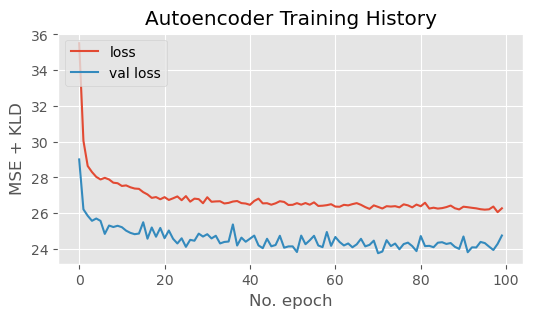

5677/5677 [==============================] - 9s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.2208 - val_loss: 28.7589
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.5492 - val_loss: 25.8274
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.8404 - val_loss: 25.0518
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2973 - val_loss: 24.9967
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4110 - val_loss: 25.0577
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0834 - val_loss: 24.9302
Epoch 7/100
283/283 

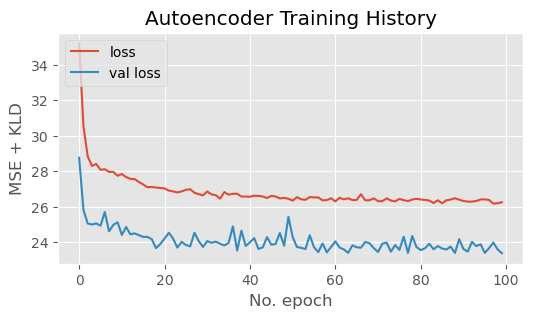

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.5547 - val_loss: 29.1815
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.6658 - val_loss: 25.5847
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.9553 - val_loss: 24.6720
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6272 - val_loss: 24.3446
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0048 - val_loss: 24.2955
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9372 - val_loss: 23.9124
Epoch 7/100
283/283

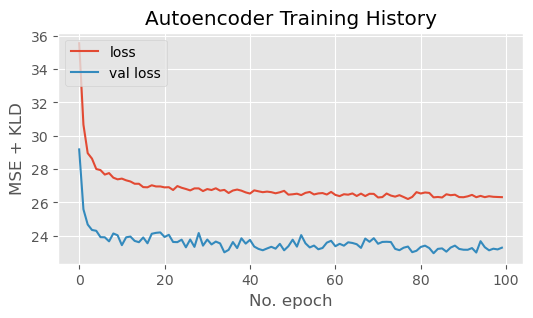

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 7ms/step - loss: 35.0769 - val_loss: 29.4429
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.0901 - val_loss: 26.9121
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.5558 - val_loss: 26.1120
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 28.0150 - val_loss: 25.7530
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 28.0068 - val_loss: 25.8698
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 27.6762 - val_loss: 25.3669
Epoch 7/100
283/283

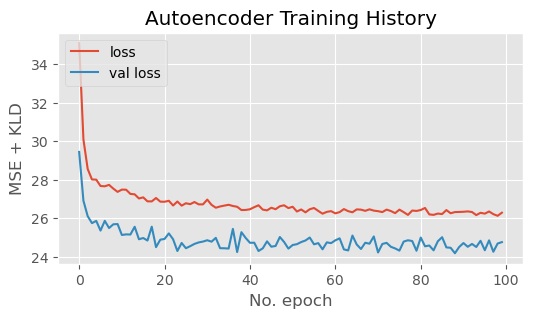

5677/5677 [==============================] - 14s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.0376 - val_loss: 39.0851
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.2730 - val_loss: 37.0976
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.5912 - val_loss: 36.1111
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.0931 - val_loss: 35.7464
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 26.8645 - val_loss: 36.1548
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 26.7512 - val_loss: 36.0711
Epoch 7/100
283/283

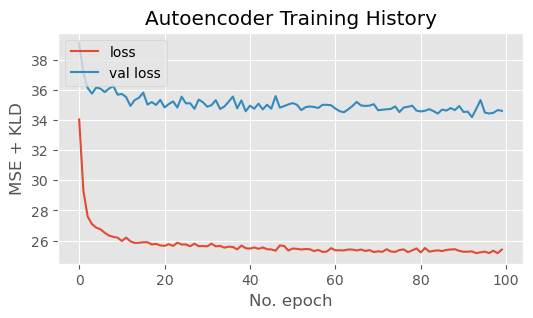

5677/5677 [==============================] - 15s 3ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 5ms/step - loss: 35.8910 - val_loss: 30.5189
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 30.8130 - val_loss: 26.3975
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.7716 - val_loss: 25.6478
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.4360 - val_loss: 25.6838
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 27.9859 - val_l

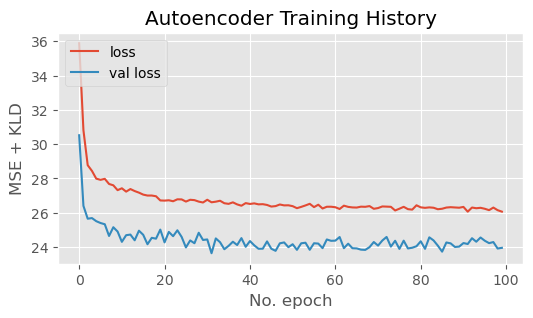

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.0832 - val_loss: 27.7932
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.9917 - val_loss: 25.7607
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.9638 - val_loss: 25.3043
Epoch 4/100
283/283 [==============================] - 3s 9ms/step - loss: 28.4868 - val_loss: 24.9226
Epoch 5/100
283/283 [==============================] - 2s 8ms/step - loss: 28.1645 - val_loss: 24.7476
Epoch 6/100
283/283 [==============================] - 2s 6ms/step - loss: 28.2309 - val_loss: 25.0875
Epoch 7/100
283/283

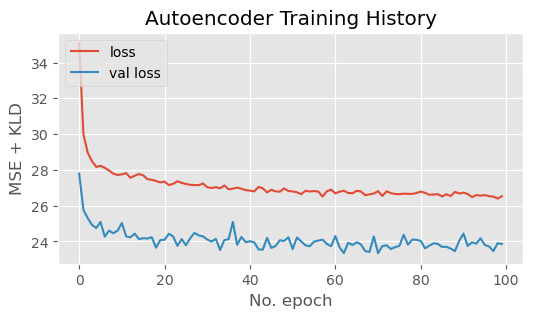

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 8ms/step - loss: 35.3534 - val_loss: 28.5952
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 30.2302 - val_loss: 25.3087
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.5259 - val_loss: 24.7761
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4488 - val_loss: 24.5241
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0963 - val_loss: 24.1543
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0277 - val_loss: 23.9726
Epoch 7/100
283/283

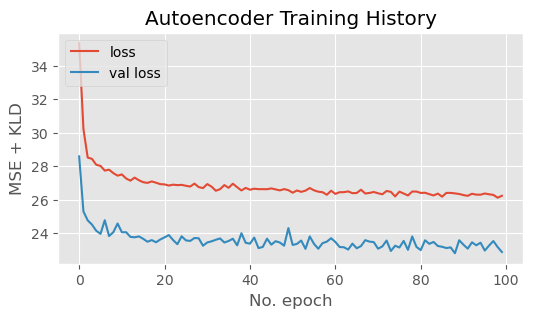

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.2841 - val_loss: 29.5384
Epoch 2/100
283/283 [==============================] - 2s 6ms/step - loss: 30.1011 - val_loss: 26.6040
Epoch 3/100
283/283 [==============================] - 2s 7ms/step - loss: 28.6030 - val_loss: 26.1901
Epoch 4/100
283/283 [==============================] - 2s 6ms/step - loss: 28.0193 - val_loss: 25.5984
Epoch 5/100
283/283 [==============================] - 2s 6ms/step - loss: 27.9438 - val_loss: 25.6435
Epoch 6/100
283/283 [==============================] - 2s 6ms/step - loss: 27.5789 - val_loss: 25.2080
Epoch 7/100
283/283

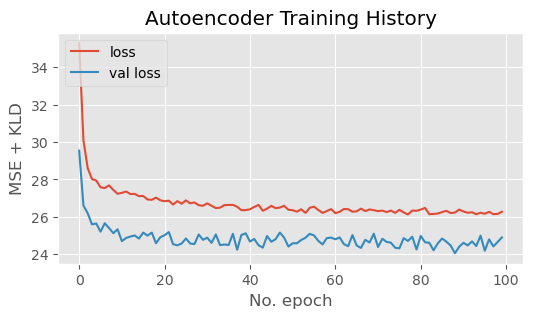

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 33.4630 - val_loss: 38.2842
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4770 - val_loss: 36.7777
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.3600 - val_loss: 36.4007
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.1845 - val_loss: 35.7252
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7260 - val_loss: 36.1413
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.6296 - val_loss: 35.3730
Epoch 7/100
283/283

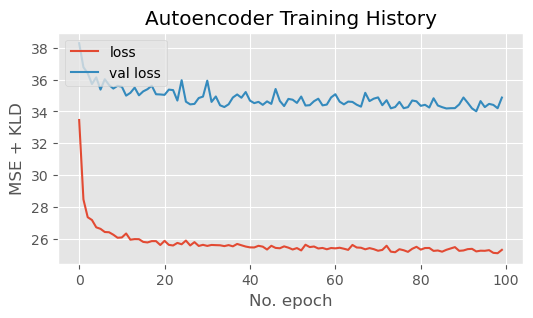

5677/5677 [==============================] - 15s 3ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 6ms/step - loss: 35.4222 - val_loss: 30.5183
Epoch 2/100
284/284 [==============================] - 1s 5ms/step - loss: 30.6338 - val_loss: 26.4203
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.6772 - val_loss: 25.5913
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.3141 - val_loss: 25.5097
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 27.8841 - val_loss: 

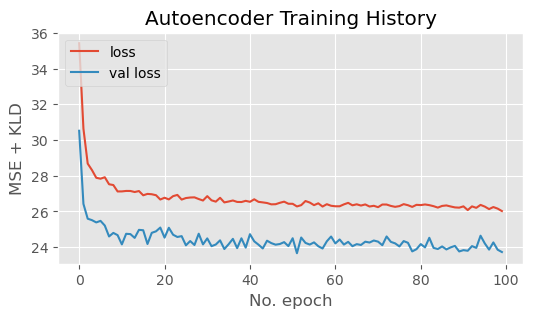

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.2073 - val_loss: 28.9183
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2072 - val_loss: 25.9674
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7190 - val_loss: 24.9995
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3704 - val_loss: 24.7102
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9517 - val_loss: 24.8970
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9650 - val_loss: 24.1524
Epoch 7/100
283/283

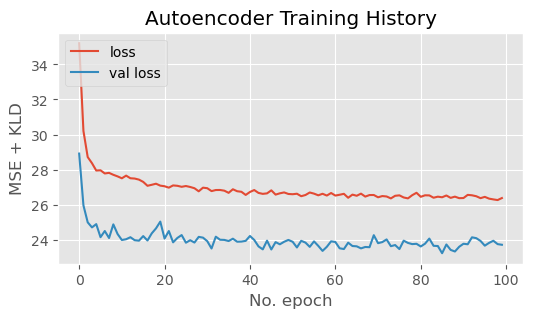

5677/5677 [==============================] - 9s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.1993 - val_loss: 27.0656
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2030 - val_loss: 25.1237
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.9156 - val_loss: 24.7000
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3223 - val_loss: 24.3975
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0881 - val_loss: 24.2796
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9246 - val_loss: 24.3604
Epoch 7/100
283/283 

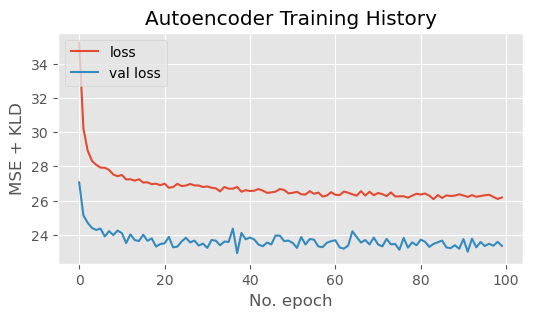

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.1284 - val_loss: 29.7025
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.7238 - val_loss: 26.6048
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2194 - val_loss: 26.0029
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0196 - val_loss: 25.9355
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.6654 - val_loss: 25.3783
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.5236 - val_loss: 25.5085
Epoch 7/100
283/283

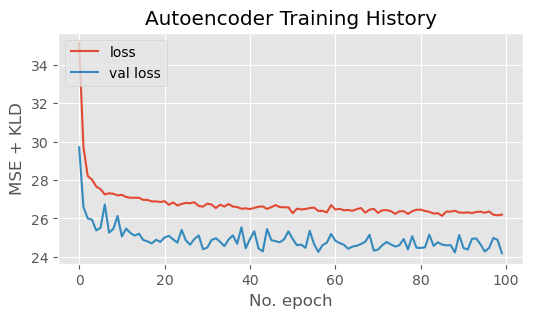

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 33.3932 - val_loss: 38.3928
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6574 - val_loss: 36.5940
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.4849 - val_loss: 36.0788
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.1103 - val_loss: 35.9678
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.6390 - val_loss: 35.9536
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7808 - val_loss: 35.6130
Epoch 7/100
283/283

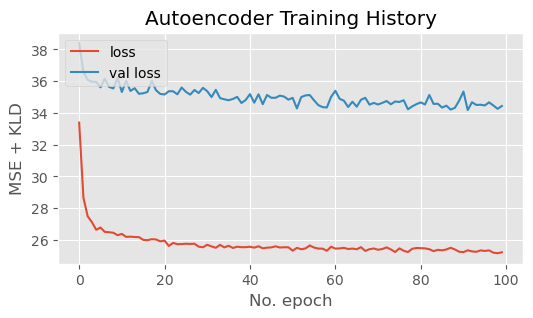

5677/5677 [==============================] - 11s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 35.8329 - val_loss: 31.2740
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 31.0281 - val_loss: 26.8280
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.9292 - val_loss: 25.6939
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.3089 - val_loss: 26.0098
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 27.9775 - val_lo

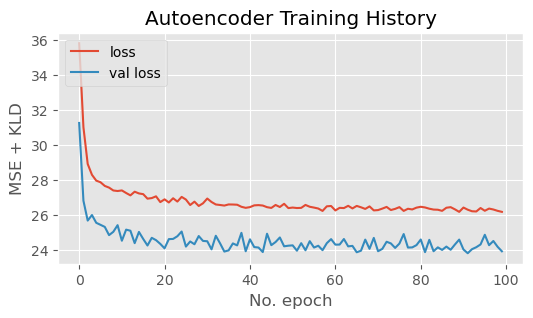

5677/5677 [==============================] - 16s 3ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 6ms/step - loss: 35.4352 - val_loss: 28.3621
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.1613 - val_loss: 25.7425
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.8890 - val_loss: 25.1136
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3411 - val_loss: 24.9443
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0575 - val_loss: 24.7125
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8226 - val_loss: 24.4919
Epoch 7/100
283/283

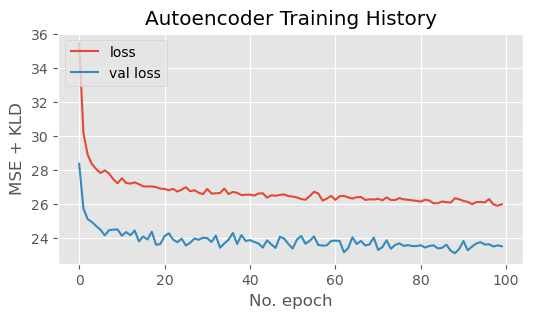

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.3699 - val_loss: 27.5319
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.7766 - val_loss: 25.0169
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3778 - val_loss: 25.0473
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2362 - val_loss: 24.3492
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0687 - val_loss: 24.3307
Epoch 6/100
283/283 [==============================] - 2s 9ms/step - loss: 27.9895 - val_loss: 24.1182
Epoch 7/100
283/283

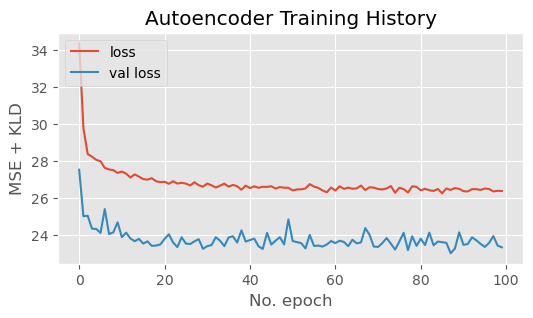

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.9148 - val_loss: 29.6082
Epoch 2/100
283/283 [==============================] - 2s 7ms/step - loss: 30.1840 - val_loss: 27.1020
Epoch 3/100
283/283 [==============================] - 2s 7ms/step - loss: 28.4465 - val_loss: 25.8144
Epoch 4/100
283/283 [==============================] - 2s 6ms/step - loss: 28.1764 - val_loss: 25.9360
Epoch 5/100
283/283 [==============================] - 2s 6ms/step - loss: 27.7841 - val_loss: 25.4894
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 27.8405 - val_loss: 25.3574
Epoch 7/100
283/283

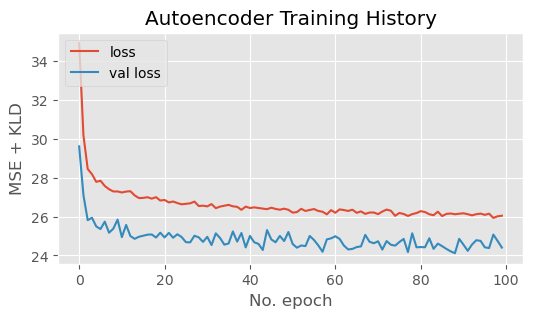

5677/5677 [==============================] - 14s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 33.7142 - val_loss: 38.9956
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.0958 - val_loss: 36.6937
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.2964 - val_loss: 36.2513
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 27.1009 - val_loss: 36.1632
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 26.9232 - val_loss: 36.1113
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 26.6976 - val_loss: 36.4300
Epoch 7/100
283/283

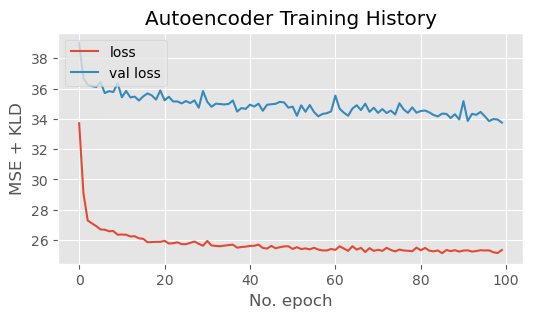

5677/5677 [==============================] - 12s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 6ms/step - loss: 35.0558 - val_loss: 29.6725
Epoch 2/100
284/284 [==============================] - 3s 11ms/step - loss: 29.9843 - val_loss: 25.9693
Epoch 3/100
284/284 [==============================] - 2s 7ms/step - loss: 28.7079 - val_loss: 25.8879
Epoch 4/100
284/284 [==============================] - 2s 7ms/step - loss: 28.3843 - val_loss: 25.8104
Epoch 5/100
284/284 [==============================] - 2s 7ms/step - loss: 27.9804 - val_loss: 

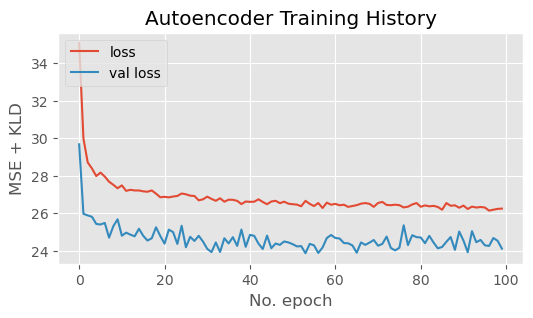

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.0327 - val_loss: 27.6891
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.9333 - val_loss: 25.6141
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7871 - val_loss: 24.9793
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1471 - val_loss: 24.7806
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0079 - val_loss: 24.6753
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8076 - val_loss: 24.2226
Epoch 7/100
283/283

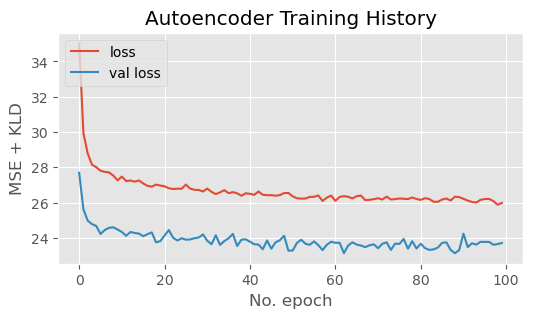

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 4s 9ms/step - loss: 35.0096 - val_loss: 27.6769
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.1448 - val_loss: 25.2637
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5781 - val_loss: 24.7819
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2496 - val_loss: 24.5272
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3354 - val_loss: 24.7840
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9979 - val_loss: 23.9219
Epoch 7/100
283/283

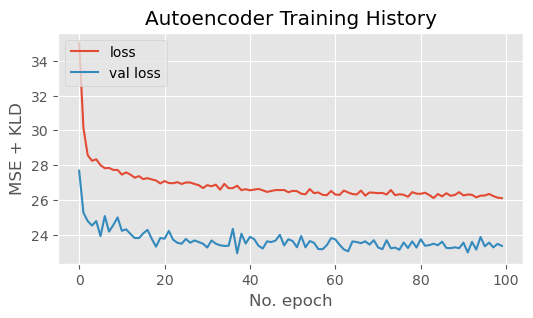

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.7598 - val_loss: 29.6829
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.8621 - val_loss: 26.4577
Epoch 3/100
283/283 [==============================] - 2s 6ms/step - loss: 28.3648 - val_loss: 26.3042
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1521 - val_loss: 25.9687
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.7313 - val_loss: 25.4245
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.6572 - val_loss: 25.4599
Epoch 7/100
283/283

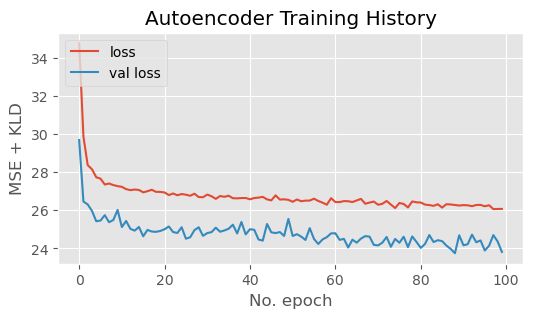

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 33.6862 - val_loss: 38.2959
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 28.5167 - val_loss: 36.2949
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.0727 - val_loss: 35.7966
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 26.8897 - val_loss: 35.8013
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 26.5941 - val_loss: 36.0248
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 26.6417 - val_loss: 35.7765
Epoch 7/100
283/283

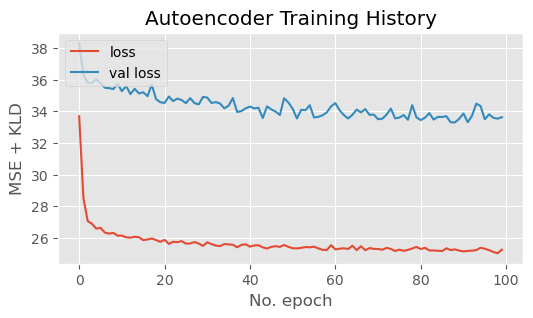

5677/5677 [==============================] - 12s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 35.1203 - val_loss: 29.5256
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 30.1584 - val_loss: 25.9185
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.7119 - val_loss: 25.6303
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.2734 - val_loss: 25.6405
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 27.9229 - val_lo

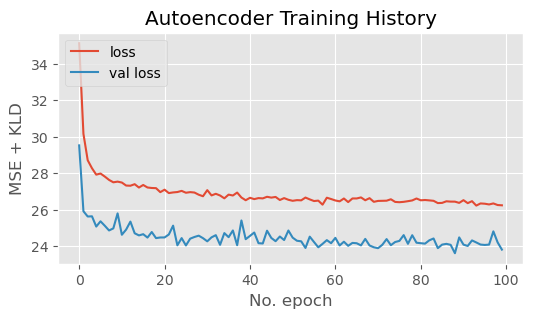

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.8696 - val_loss: 28.6703
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.0332 - val_loss: 25.4734
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6576 - val_loss: 24.8901
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3817 - val_loss: 24.7096
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9052 - val_loss: 24.7239
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9879 - val_loss: 24.4105
Epoch 7/100
283/283

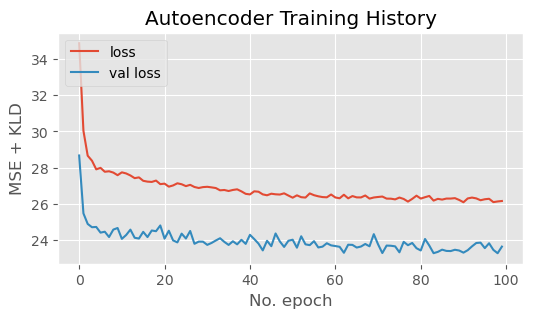

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 34.7001 - val_loss: 27.3504
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 30.0083 - val_loss: 25.3668
Epoch 3/100
283/283 [==============================] - 1s 5ms/step - loss: 28.5631 - val_loss: 25.0118
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 28.3088 - val_loss: 24.6010
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 28.3944 - val_loss: 24.6448
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0665 - val_loss: 24.1543
Epoch 7/100
283/283

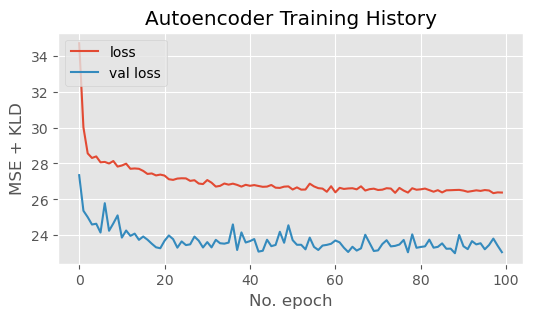

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 8ms/step - loss: 34.7177 - val_loss: 29.1103
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 29.8767 - val_loss: 26.7480
Epoch 3/100
283/283 [==============================] - 1s 5ms/step - loss: 28.5210 - val_loss: 26.2816
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 28.1650 - val_loss: 25.8983
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 28.2126 - val_loss: 26.0449
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.8189 - val_loss: 25.5155
Epoch 7/100
283/283

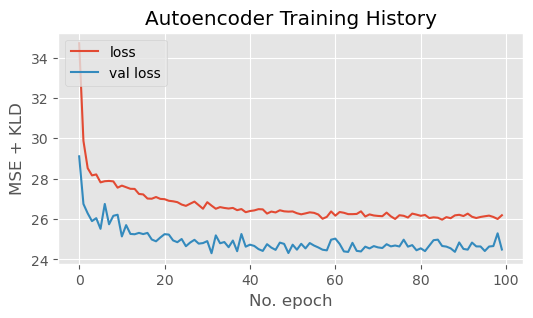

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.7242 - val_loss: 39.7846
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.0088 - val_loss: 37.2414
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.7483 - val_loss: 36.2174
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.2713 - val_loss: 35.6334
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.8590 - val_loss: 35.8797
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.9722 - val_loss: 35.6579
Epoch 7/100
283/283

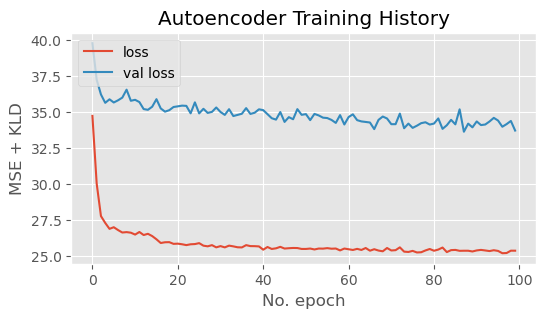

5677/5677 [==============================] - 11s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 5ms/step - loss: 35.0363 - val_loss: 29.3201
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 29.9351 - val_loss: 26.0350
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.5459 - val_loss: 25.4936
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.2906 - val_loss: 25.5277
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 27.8940 - val_loss: 2

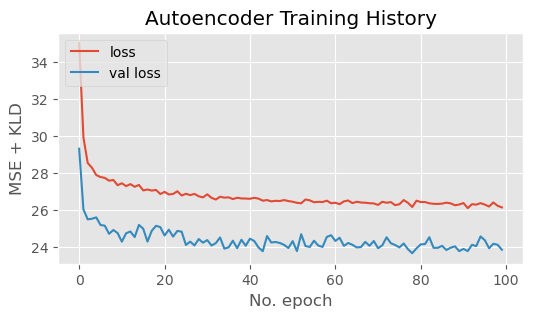

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 4ms/step - loss: 34.8923 - val_loss: 28.6445
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.9219 - val_loss: 25.6019
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5580 - val_loss: 25.0355
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3814 - val_loss: 24.9570
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9656 - val_loss: 24.7024
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8535 - val_loss: 24.7837
Epoch 7/100
283/283

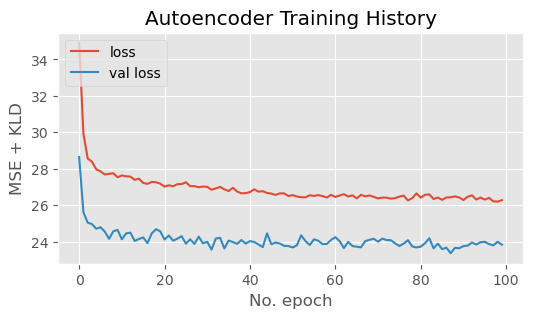

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 35.6009 - val_loss: 28.6511
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2255 - val_loss: 25.2824
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5011 - val_loss: 24.9550
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3488 - val_loss: 24.3912
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1364 - val_loss: 24.1776
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0090 - val_loss: 23.9500
Epoch 7/100
283/283

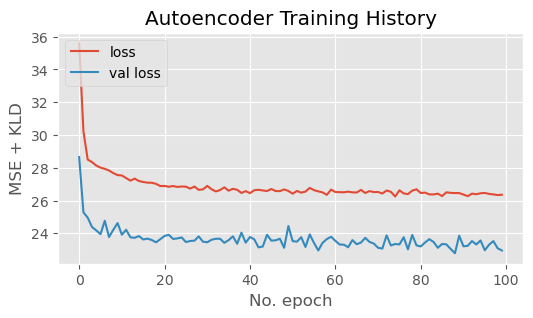

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.6823 - val_loss: 29.7813
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.9093 - val_loss: 27.0093
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.6839 - val_loss: 25.9045
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2788 - val_loss: 25.7740
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8897 - val_loss: 26.0161
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0073 - val_loss: 25.8923
Epoch 7/100
283/283

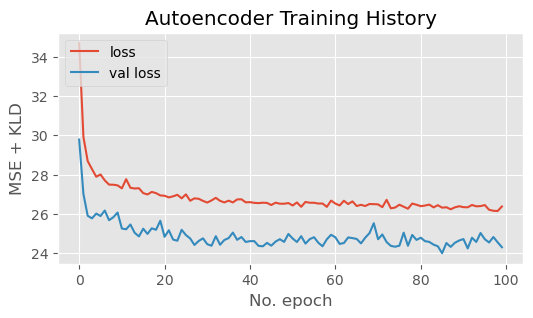

5677/5677 [==============================] - 16s 3ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.1551 - val_loss: 39.0835
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 28.9715 - val_loss: 36.9587
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.4108 - val_loss: 36.0315
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 27.0091 - val_loss: 36.1330
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.5746 - val_loss: 36.3175
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.6520 - val_loss: 35.8329
Epoch 7/100
283/283

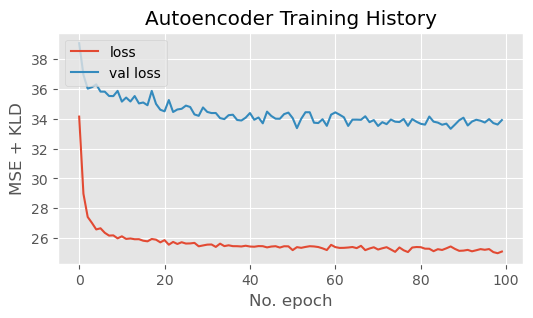

5677/5677 [==============================] - 12s 2ms/step


TypeError: list indices must be integers or slices, not list

In [ ]:
#With hyperparameter tuning
#Cross validation
skf = StratifiedKFold(n_splits=5)

# Define the hyperparameters to tune
param_grid = {
     'C': [0.01, 0.1, 10], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize variables to store the best hyperparameters and AUC score
best_params = {}
best_scores = []
best_f1 = -np.inf

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    lst_accuracy = []
    lst_precision = []
    lst_recall = []
    lst_f1_score = []
    lst_roc_auc_score = []
    
    f1_scores = []

    #estimator = RandomForestClassifier(n_estimators=50)
    model = LogisticRegression(C=params['C'], penalty=params['penalty'], solver=params['solver'])

    print("############################### Parameters tested:", params,"################################")
    for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
        print("------------------------ KFold:", count+1, "---------------------------")
        X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
        print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
        
        maj = len(y_train_fold[y_train_fold == 0])
        mino = len(y_train_fold[y_train_fold == 1])
        frac = 0.5
        num_samples = round(1/(1/frac - 1) * maj - mino)

        print("Number of samples to be generated: ", num_samples)

        # Variational Oversampling 
        vos = VAE_oversampling(hidden_dim= 64,
                                latent_dim=2,
                                original_dim=30,
                                minority_class_id=1,
                                epochs=100,
                                batch_size=1,
                                num_samples_to_generate = num_samples,
                                random_state = 0,
                                optimizer="adam")
        

        #Fit the VAE oversampling model and get new data set
        X_res_val,y_res_val = vos.fit_sample(X_train_fold,y_train_fold)
        
        std = StandardScaler()

        X_train_processed = std.fit_transform(X_res_val) 
        X_valid_processed = std.transform(X_valid_fold)


        model.fit(X_train_processed, y_res_val)

        y_pred_test = model.predict(X_valid_processed)

        lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
        lst_precision.append(precision_score(y_valid_fold, y_pred_test))
        lst_recall.append(recall_score(y_valid_fold, y_pred_test))
        lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
        lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))


    avg_f1 = np.mean(lst_f1_score)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_scores = [lst_accuracy, lst_precision, lst_recall, lst_f1_score, lst_roc_auc_score]
        best_params = params

# Print the best AUC score and hyperparameters
print(f"Accuracy:, {np.mean(best_scores[0]):0.6f} (+/- {np.std(best_scores[0]):0.6f})")
print(f"Precision: {np.mean(best_scores[1]):0.6f} (+/- {np.std(best_scores[1]):0.6f})")
print(f"Recall: {np.mean(best_scores[2]):0.6f} (+/- {np.std(best_scores[2]):0.6f})")
print(f"F1 score: {np.mean(best_scores[3]):0.6f} (+/- {np.std(best_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(best_scores[4]):0.6f} (+/- {np.std(best_scores[4]):0.6f})")
print("Best hyperparameters:", best_params)


In [ ]:
print(f"Accuracy:, {np.mean(best_scores[0]):0.6f} (+/- {np.std(best_scores[0]):0.6f})")
print(f"Precision: {np.mean(best_scores[1]):0.6f} (+/- {np.std(best_scores[1]):0.6f})")
print(f"Recall: {np.mean(best_scores[2]):0.6f} (+/- {np.std(best_scores[2]):0.6f})")
print(f"F1 score: {np.mean(best_scores[3]):0.6f} (+/- {np.std(best_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(best_scores[4]):0.6f} (+/- {np.std(best_scores[4]):0.6f})")
print("Best hyperparameters:", best_params)

Accuracy:, 0.999381 (+/- 0.000064)
Precision: 0.864615 (+/- 0.011990)
Recall: 0.761246 (+/- 0.040059)
F1 score: 0.809093 (+/- 0.024669)
ROC_AUC: 0.880520 (+/- 0.020026)
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### Cross Validation

------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
NUmber of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 4s 8ms/step - loss: 35.1794 - val_loss: 29.9014
Epoch 2/100
284/284 [==============================] - 2s 5ms/step - loss: 29.9847 - val_loss: 26.0387
Epoch 3/100
284/284 [==============================] - 2s 5ms/step - loss: 28.5184 - val_loss: 25.5911
Epoch 4/100
284/284 [==============================] - 1s 5ms/step - loss: 28.3093 - val_loss: 25.6729
Epoch 5/100
284/284 [==============================] - 2s 5ms/step - loss: 28.0314 - val_loss: 25.5915
Epoch 6/100
284/284 [==============================] - 1s 5ms/step - loss: 27.8190 - val_loss: 25.2167
Epoch 7/100
284/284 [==============================] - 2s 6ms/step - loss: 27

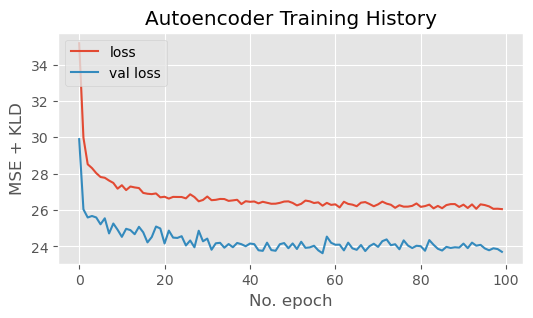

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 34.8834 - val_loss: 28.7611
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.5523 - val_loss: 25.7691
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.8248 - val_loss: 24.9859
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4759 - val_loss: 24.6985
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9646 - val_loss: 24.7080
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9910 - val_loss: 24.3737
Epoch 7/100
283/283

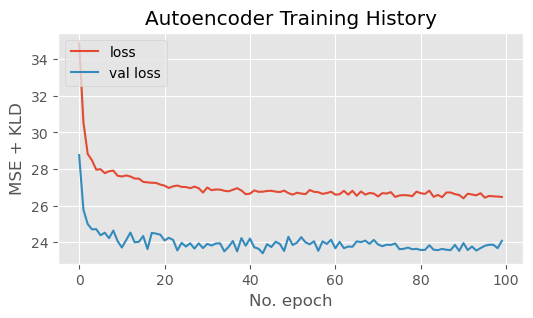

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.2834 - val_loss: 28.5419
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.4888 - val_loss: 25.2955
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.5580 - val_loss: 24.7404
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3773 - val_loss: 24.4345
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2098 - val_loss: 24.1911
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0267 - val_loss: 24.1600
Epoch 7/100
283/283

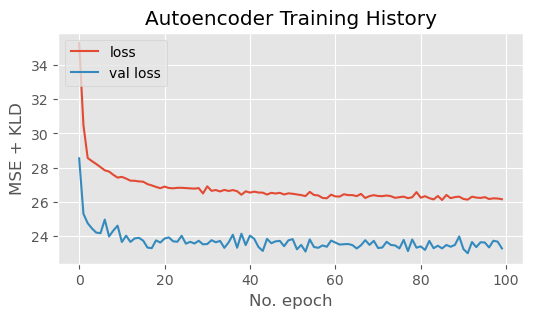

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 35.3341 - val_loss: 29.0155
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.9060 - val_loss: 26.6634
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.5471 - val_loss: 26.3409
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 28.1980 - val_loss: 25.8920
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1032 - val_loss: 25.9279
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7648 - val_loss: 25.5799
Epoch 7/100
283/283

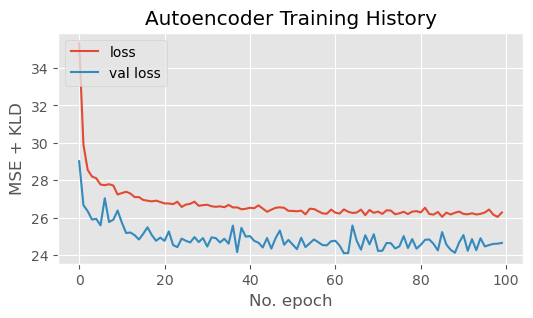

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 8ms/step - loss: 33.8849 - val_loss: 38.4271
Epoch 2/100
283/283 [==============================] - 2s 6ms/step - loss: 28.6253 - val_loss: 37.1803
Epoch 3/100
283/283 [==============================] - 2s 5ms/step - loss: 27.4597 - val_loss: 36.1254
Epoch 4/100
283/283 [==============================] - 2s 5ms/step - loss: 27.0349 - val_loss: 35.9282
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 26.6845 - val_loss: 36.0754
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 26.6525 - val_loss: 35.8038
Epoch 7/100
283/283

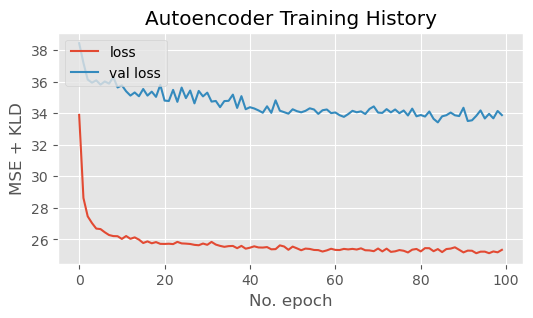

5677/5677 [==============================] - 11s 2ms/step


In [ ]:
#Cross validation
skf = StratifiedKFold(n_splits=5)
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1_score = []
lst_roc_auc_score = []

#estimator = RandomForestClassifier(n_estimators=50)
model = LogisticRegression()

for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
    print("------------------------ KFold:", count+1, "---------------------------")
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
    print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
    
    maj = len(y_train_fold[y_train_fold == 0])
    mino = len(y_train_fold[y_train_fold == 1])
    frac = 0.5
    num_samples = round(1/(1/frac - 1) * maj - mino)

    print("NUmber of samples to be generated: ", num_samples)

    # Variational Oversampling 
    vos = VAE_oversampling(hidden_dim= 64,
                            latent_dim=2,
                            original_dim=30,
                            minority_class_id=1,
                            epochs=100,
                            batch_size=1,
                            num_samples_to_generate = num_samples,
                            random_state = 0,
                            optimizer="adam")
    
    #Fit the VAE oversampling model and get new data set
    X_res_val,y_res_val = vos.fit_sample(X_train_fold,y_train_fold)
    
    std = StandardScaler()
    
    X_train_processed = std.fit_transform(X_res_val) 
    X_valid_processed = std.transform(X_valid_fold)

    model.fit(X_train_processed, y_res_val)

    y_pred_test = model.predict(X_valid_processed)

    lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
    lst_precision.append(precision_score(y_valid_fold, y_pred_test))
    lst_recall.append(recall_score(y_valid_fold, y_pred_test))
    lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
    lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))


In [ ]:
print(f"Accuracy:, {np.mean(lst_accuracy):0.6f} (+/- {np.std(lst_accuracy):0.6f})")
print(f"Precision: {np.mean(lst_precision):0.6f} (+/- {np.std(lst_precision):0.6f})")
print(f"Recall: {np.mean(lst_recall):0.6f} (+/- {np.std(lst_recall):0.6f})")
print(f"F1 score: {np.mean(lst_f1_score):0.6f} (+/- {np.std(lst_f1_score):0.6f})")
print(f"ROC_AUC: {np.mean(lst_roc_auc_score):0.6f} (+/- {np.std(lst_roc_auc_score):0.6f})")

Accuracy:, 0.999280 (+/- 0.000029)
Precision: 0.855332 (+/- 0.008243)
Recall: 0.702921 (+/- 0.029841)
F1 score: 0.771179 (+/- 0.015431)
ROC_AUC: 0.851357 (+/- 0.014910)


### One fit

Epoch 1/100
354/354 [==============================] - 6s 13ms/step - loss: 34.6033 - val_loss: 25.9905
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 29.6325 - val_loss: 24.3187
Epoch 3/100
354/354 [==============================] - 2s 6ms/step - loss: 28.4825 - val_loss: 23.7741
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 28.0958 - val_loss: 23.6386
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 28.0318 - val_loss: 23.5838
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 27.8937 - val_loss: 23.3982
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 27.8149 - val_loss: 23.2489
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 27.6091 - val_loss: 23.3994
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: 27.6666 - val_loss: 23.2086
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - lo

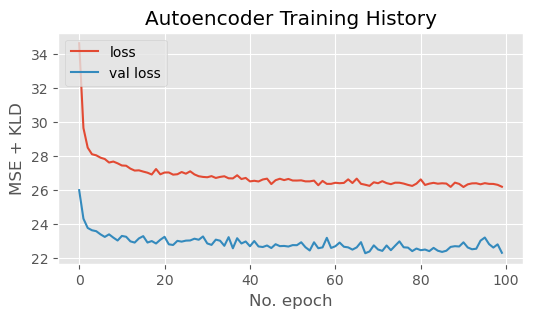

7096/7096 [==============================] - 15s 2ms/step


In [ ]:
maj = len(y_train[y_train == 0])
mino = len(y_train[y_train == 1])
frac = 0.5
num_samples = round(1/(1/frac - 1) * maj - mino)

# Variational Oversampling 
vos = VAE_oversampling(hidden_dim= 64,
                        latent_dim=2,
                        original_dim=30,
                        minority_class_id=1,
                        epochs=100,
                        batch_size=1,
                        num_samples_to_generate = num_samples,
                        random_state = 0,
                        optimizer="adam")

#Fit the VAE oversampling model and get new data set
X_res_val,y_res_val = vos.fit_sample(X_train, y_train)

std = StandardScaler()

X_train_processed = std.fit_transform(X_res_val) 
X_test_processed = std.transform(X_test)

In [ ]:
pd.DataFrame(X_res_val)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,161919.000000,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.320000
1,124477.000000,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.990000
2,41191.000000,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.100000
3,132624.000000,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.100000
4,59359.000000,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,82832.179688,-4.173392,3.668420,-6.578082,4.687133,-2.886705,-1.318493,-5.278883,0.618234,-2.515834,...,0.367891,0.807397,0.057349,-0.051940,-0.109108,0.019901,0.245528,1.112971,0.079294,135.423935
454898,100672.437500,-0.155211,3.588729,-0.725867,4.592975,1.438116,-0.438940,-0.624459,0.587929,-0.172388,...,0.358018,0.628814,0.051318,-0.062790,-0.109108,0.039748,0.047834,0.156829,0.078113,125.768768
454899,130757.750000,0.102923,3.588729,-1.890665,4.592975,2.088203,-1.384610,-1.036765,0.587926,-0.339840,...,0.358018,0.628814,0.051318,-0.062790,-0.109108,0.019994,0.047851,0.155962,0.099951,125.591469
454900,83348.742188,-4.154328,3.604995,-6.710429,4.642052,-2.645648,-1.387187,-5.203990,1.447973,-2.584458,...,0.358318,0.721408,0.051396,-0.062786,-0.099142,0.020916,0.132864,0.329254,0.353601,125.591476


In [ ]:
logReg_vae = LogisticRegression()

logReg_vae.fit(X_train_processed, y_res_val)

#predict
pred_lr_vae_val = logReg_vae.predict(X_test_processed)

model_scores(y_test, pred_lr_vae_val)

Accuracy: 0.9991573329588147
Precision: 0.7450980392156863
Recall: 0.7755102040816326
F1 score: 0.76
ROC_AUC: 0.8875264863964719
